<a href="https://colab.research.google.com/github/TruongTrungQuan20146404/Truong_Trung_Quan_20146404/blob/main/CK_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 443 images belonging to 10 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 97 images belonging to 10 classes.


In [ ]:
training_data.class_indices

{'ao so mi nam': 0,
 'ao thun nam': 1,
 'ao vest nam': 2,
 'dep': 3,
 'giay tay': 4,
 'giay the thao': 5,
 'mu luoi trai': 6,
 'quan jean': 7,
 'quan short': 8,
 'quan tay': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_data,epochs=50,batch_size=150,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
14/14 [==============================] - 276s 20s/step - loss: 3.1197 - accuracy: 0.1219 - val_loss: 2.2433 - val_accuracy: 0.0928
Epoch 2/50
14/14 [==============================] - 94s 7s/step - loss: 2.1750 - accuracy: 0.2122 - val_loss: 2.1020 - val_accuracy: 0.3093
Epoch 3/50
14/14 [==============================] - 93s 7s/step - loss: 2.0107 - accuracy: 0.3138 - val_loss: 1.9106 - val_accuracy: 0.5773
Epoch 4/50
14/14 [==============================] - 93s 7s/step - loss: 1.6085 - accuracy: 0.4244 - val_loss: 1.6377 - val_accuracy: 0.4021
Epoch 5/50
14/14 [==============================] - 103s 7s/step - loss: 1.6129 - accuracy: 0.4537 - val_loss: 1.5425 - val_accuracy: 0.5052
Epoch 6/50
14/14 [==============================] - 93s 7s/step - loss: 1.3374 - accuracy: 0.5282 - val_loss: 0.9926 - val_accuracy: 0.6495
Epoch 7/50
14/14 [==============================] - 93s 7s/step - loss: 1.1772 - accuracy: 0.6163 - val_loss: 1.1145 - val_accuracy: 0.6392
Epoch 8/50
14/14 

<function matplotlib.pyplot.show(close=None, block=None)>

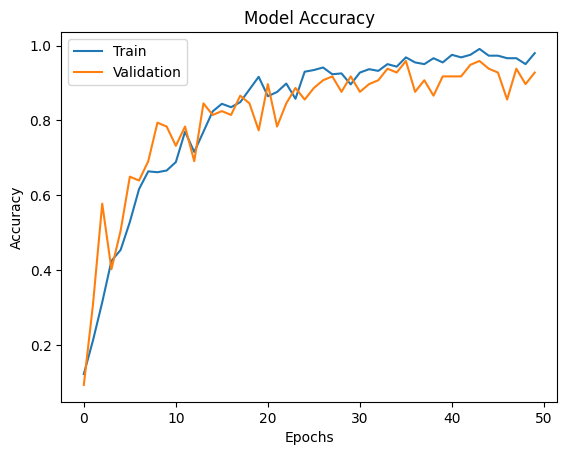

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("/content/drive/MyDrive/kkk/nhandien.h5")

In [ ]:
model_nhandien=load_model('/content/drive/MyDrive/kkk/nhandien.h5')

1/1 [==============================] - 0s 264ms/step
ao so mi nam


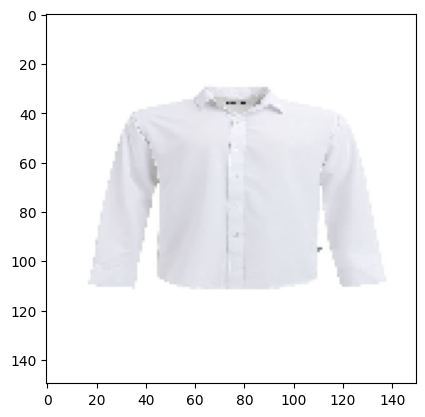

In [ ]:
img=load_img("/content/drive/MyDrive/test/ao so mi nam/ao so mi nam1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='ao so mi nam'
if round(result[0][1])==1:
  prediction='ao thun nam'
if round(result[0][2])==1:
  prediction='ao vest nam'
if round(result[0][3])==1:
  prediction='dep'
if round(result[0][4])==1:
  prediction='giay tay'
if round(result[0][5])==1:
  prediction='giay the thao'
if round(result[0][6])==1:
  prediction='mu luoi trai'
if round(result[0][7])==1:
  prediction='quan jean'
if round(result[0][8])==1:
  prediction='quan short'
if round(result[0][9])==1:
  prediction='quan tay'
print(prediction)

1/1 [==============================] - 0s 78ms/step
ao thun nam


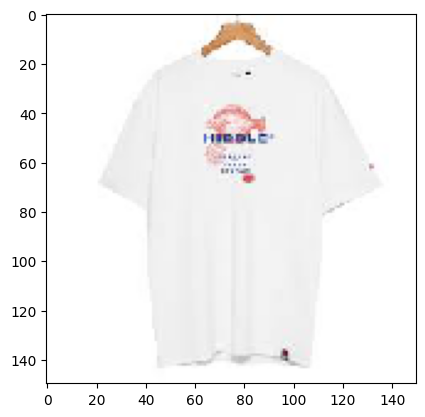

In [ ]:
img=load_img("/content/drive/MyDrive/test/ao thun nam/ao thun1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='ao so mi nam'
if round(result[0][1])==1:
  prediction='ao thun nam'
if round(result[0][2])==1:
  prediction='ao vest nam'
if round(result[0][3])==1:
  prediction='dep'
if round(result[0][4])==1:
  prediction='giay tay'
if round(result[0][5])==1:
  prediction='giay the thao'
if round(result[0][6])==1:
  prediction='mu luoi trai'
if round(result[0][7])==1:
  prediction='quan jean'
if round(result[0][8])==1:
  prediction='quan short'
if round(result[0][9])==1:
  prediction='quan tay'
print(prediction)

1/1 [==============================] - 0s 80ms/step
giay the thao


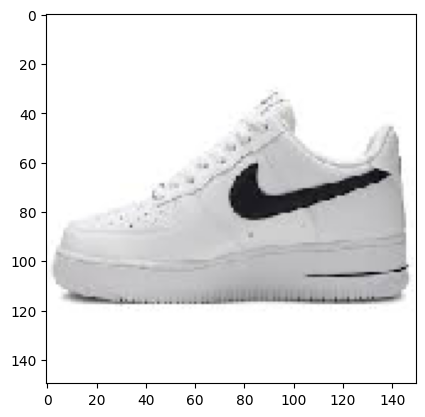

In [ ]:
img=load_img("/content/drive/MyDrive/test/giay the thao/giay the thao1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='ao so mi nam'
if round(result[0][1])==1:
  prediction='ao thun nam'
if round(result[0][2])==1:
  prediction='ao vest nam'
if round(result[0][3])==1:
  prediction='dep'
if round(result[0][4])==1:
  prediction='giay tay'
if round(result[0][5])==1:
  prediction='giay the thao'
if round(result[0][6])==1:
  prediction='mu luoi trai'
if round(result[0][7])==1:
  prediction='quan jean'
if round(result[0][8])==1:
  prediction='quan short'
if round(result[0][9])==1:
  prediction='quan tay'
print(prediction)

1/1 [==============================] - 0s 161ms/step
quan tay


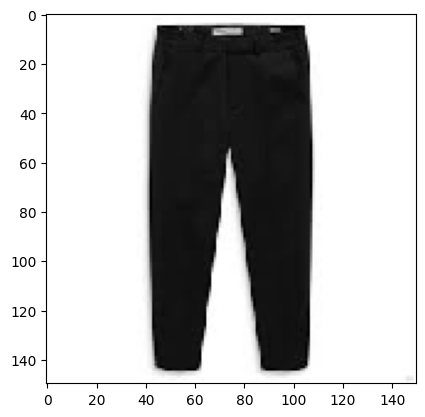

In [ ]:
img=load_img("/content/drive/MyDrive/test/quan tay/quan tay1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='ao so mi nam'
if round(result[0][1])==1:
  prediction='ao thun nam'
if round(result[0][2])==1:
  prediction='ao vest nam'
if round(result[0][3])==1:
  prediction='dep'
if round(result[0][4])==1:
  prediction='giay tay'
if round(result[0][5])==1:
  prediction='giay the thao'
if round(result[0][6])==1:
  prediction='mu luoi trai'
if round(result[0][7])==1:
  prediction='quan jean'
if round(result[0][8])==1:
  prediction='quan short'
if round(result[0][9])==1:
  prediction='quan tay'
print(prediction)